# Customer Churn Prediction

## Problem Statement:
 Customer churn is a crucial concern for businesses across sectors. Understanding customer behaviors, identifying key factors contributing to churn, and predicting when customers are likely to churn are vital for reducing revenue loss and enhancing customer retention strategies.

## Dataset Overview:
#### The dataset contains the following columns:
* `customerID`: Customer ID
* `gender`: Customer's gender
* `SeniorCitizen`: Whether the customer is a senior citizen (1 for yes, 0 for no)
* `Partner`: Whether the customer has a partner
* `Dependents`: Whether the customer has dependents
* `tenure`: Number of months the customer has stayed with the company
* `PhoneService`: Whether the customer has phone service
* `MultipleLines`: Whether the customer has multiple phone lines
* `InternetService`: Type of internet service
* `OnlineSecurity`: Whether the customer has online security
* `OnlineBackup`: Whether the customer has online backup
* `DeviceProtection`: Whether the customer has device protection
* `TechSupport`: Whether the customer has tech support
* `StreamingTV`: Whether the customer streams TV
* `StreamingMovies`: Whether the customer streams movies
* `Contract`: Type of contract (e.g., month-to-month, one year, two years)
* `PaperlessBilling`: Whether the customer uses paperless billing
* `PaymentMethod`: Payment method (e.g., electronic check, mailed check)
* `MonthlyCharges`: Monthly charges
* `TotalCharges`: Total charges
* `Churn`: Target variable, indicating whether the customer churned (1 for yes, 0 for no)

In [1]:
# Importing necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Customer_Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# This dataset contains 7043 records and 20 features with one Churn as a label
data.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# CustomerId is unique for all, It will not contribute in prediction, we will drop it.
data.drop('customerID', axis = 1, inplace = True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Great!! Now lets find the missing as well as duplicate in the dataset

In [8]:
# Checking the missing values 
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Here we can see there is no missing values present in the dataset but still we need to check for symbolic missing values
data.isin([' ','?', 'NA','-','_']).sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

OKAY, here we have some missing data in totalCharges column we have to deal with it

In [10]:
# Lets see the missing value reords
miss_index = data[data["TotalCharges"].isin([' ','?', 'NA','-','_'])]
miss_index

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In above table 11 values have missing values

In [11]:
data["TotalCharges"].replace(' ',np.nan, inplace = True)

In [12]:
data["TotalCharges"].isin([' ','?', 'NA','-','_']).sum()

0

Total charges column is in object data type ne need to change it to the float or int


In [13]:
data[['TotalCharges']] = data[['TotalCharges']].apply(pd.to_numeric)

In [14]:
print("Mean :",data['TotalCharges'].mean())
print("Median : ",data['TotalCharges'].median())

Mean : 2283.3004408418697
Median :  1397.475


In [15]:
data["TotalCharges"].replace(np.nan,data['TotalCharges'].mean(), inplace = True)

In [16]:
# Now lets check the dataset again!! 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [17]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

NICE!! Now our dataset dont have any missing values.

In [18]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


From the dataset it seems like the features "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService","OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV","StreamingMovies","PaperlessBilling" has binary values so we can convert them into 0 and 1.

In [19]:
#lets check the binary columns, is there only two values or more?
binary_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
         'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

'''["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService","OnlineSecurity", 
              "OnlineBackup", "DeviceProtection",
              "TechSupport", "StreamingTV","StreamingMovies","PaperlessBilling"]'''
           

for i in binary_col:
    print(i)
    print(data[i].value_counts())
    print("\n", "--"*50)

gender
Male      3555
Female    3488
Name: gender, dtype: int64

 ----------------------------------------------------------------------------------------------------
SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

 ----------------------------------------------------------------------------------------------------
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

 ----------------------------------------------------------------------------------------------------
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64

 ----------------------------------------------------------------------------------------------------
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64

 ----------------------------------------------------------------------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

 --------------------------------

The features "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport","PaymentMethod", "StreamingTV","StreamingMovies" has 3 values which are yes,no and No internet service

In [20]:
print(len(binary_col))

16


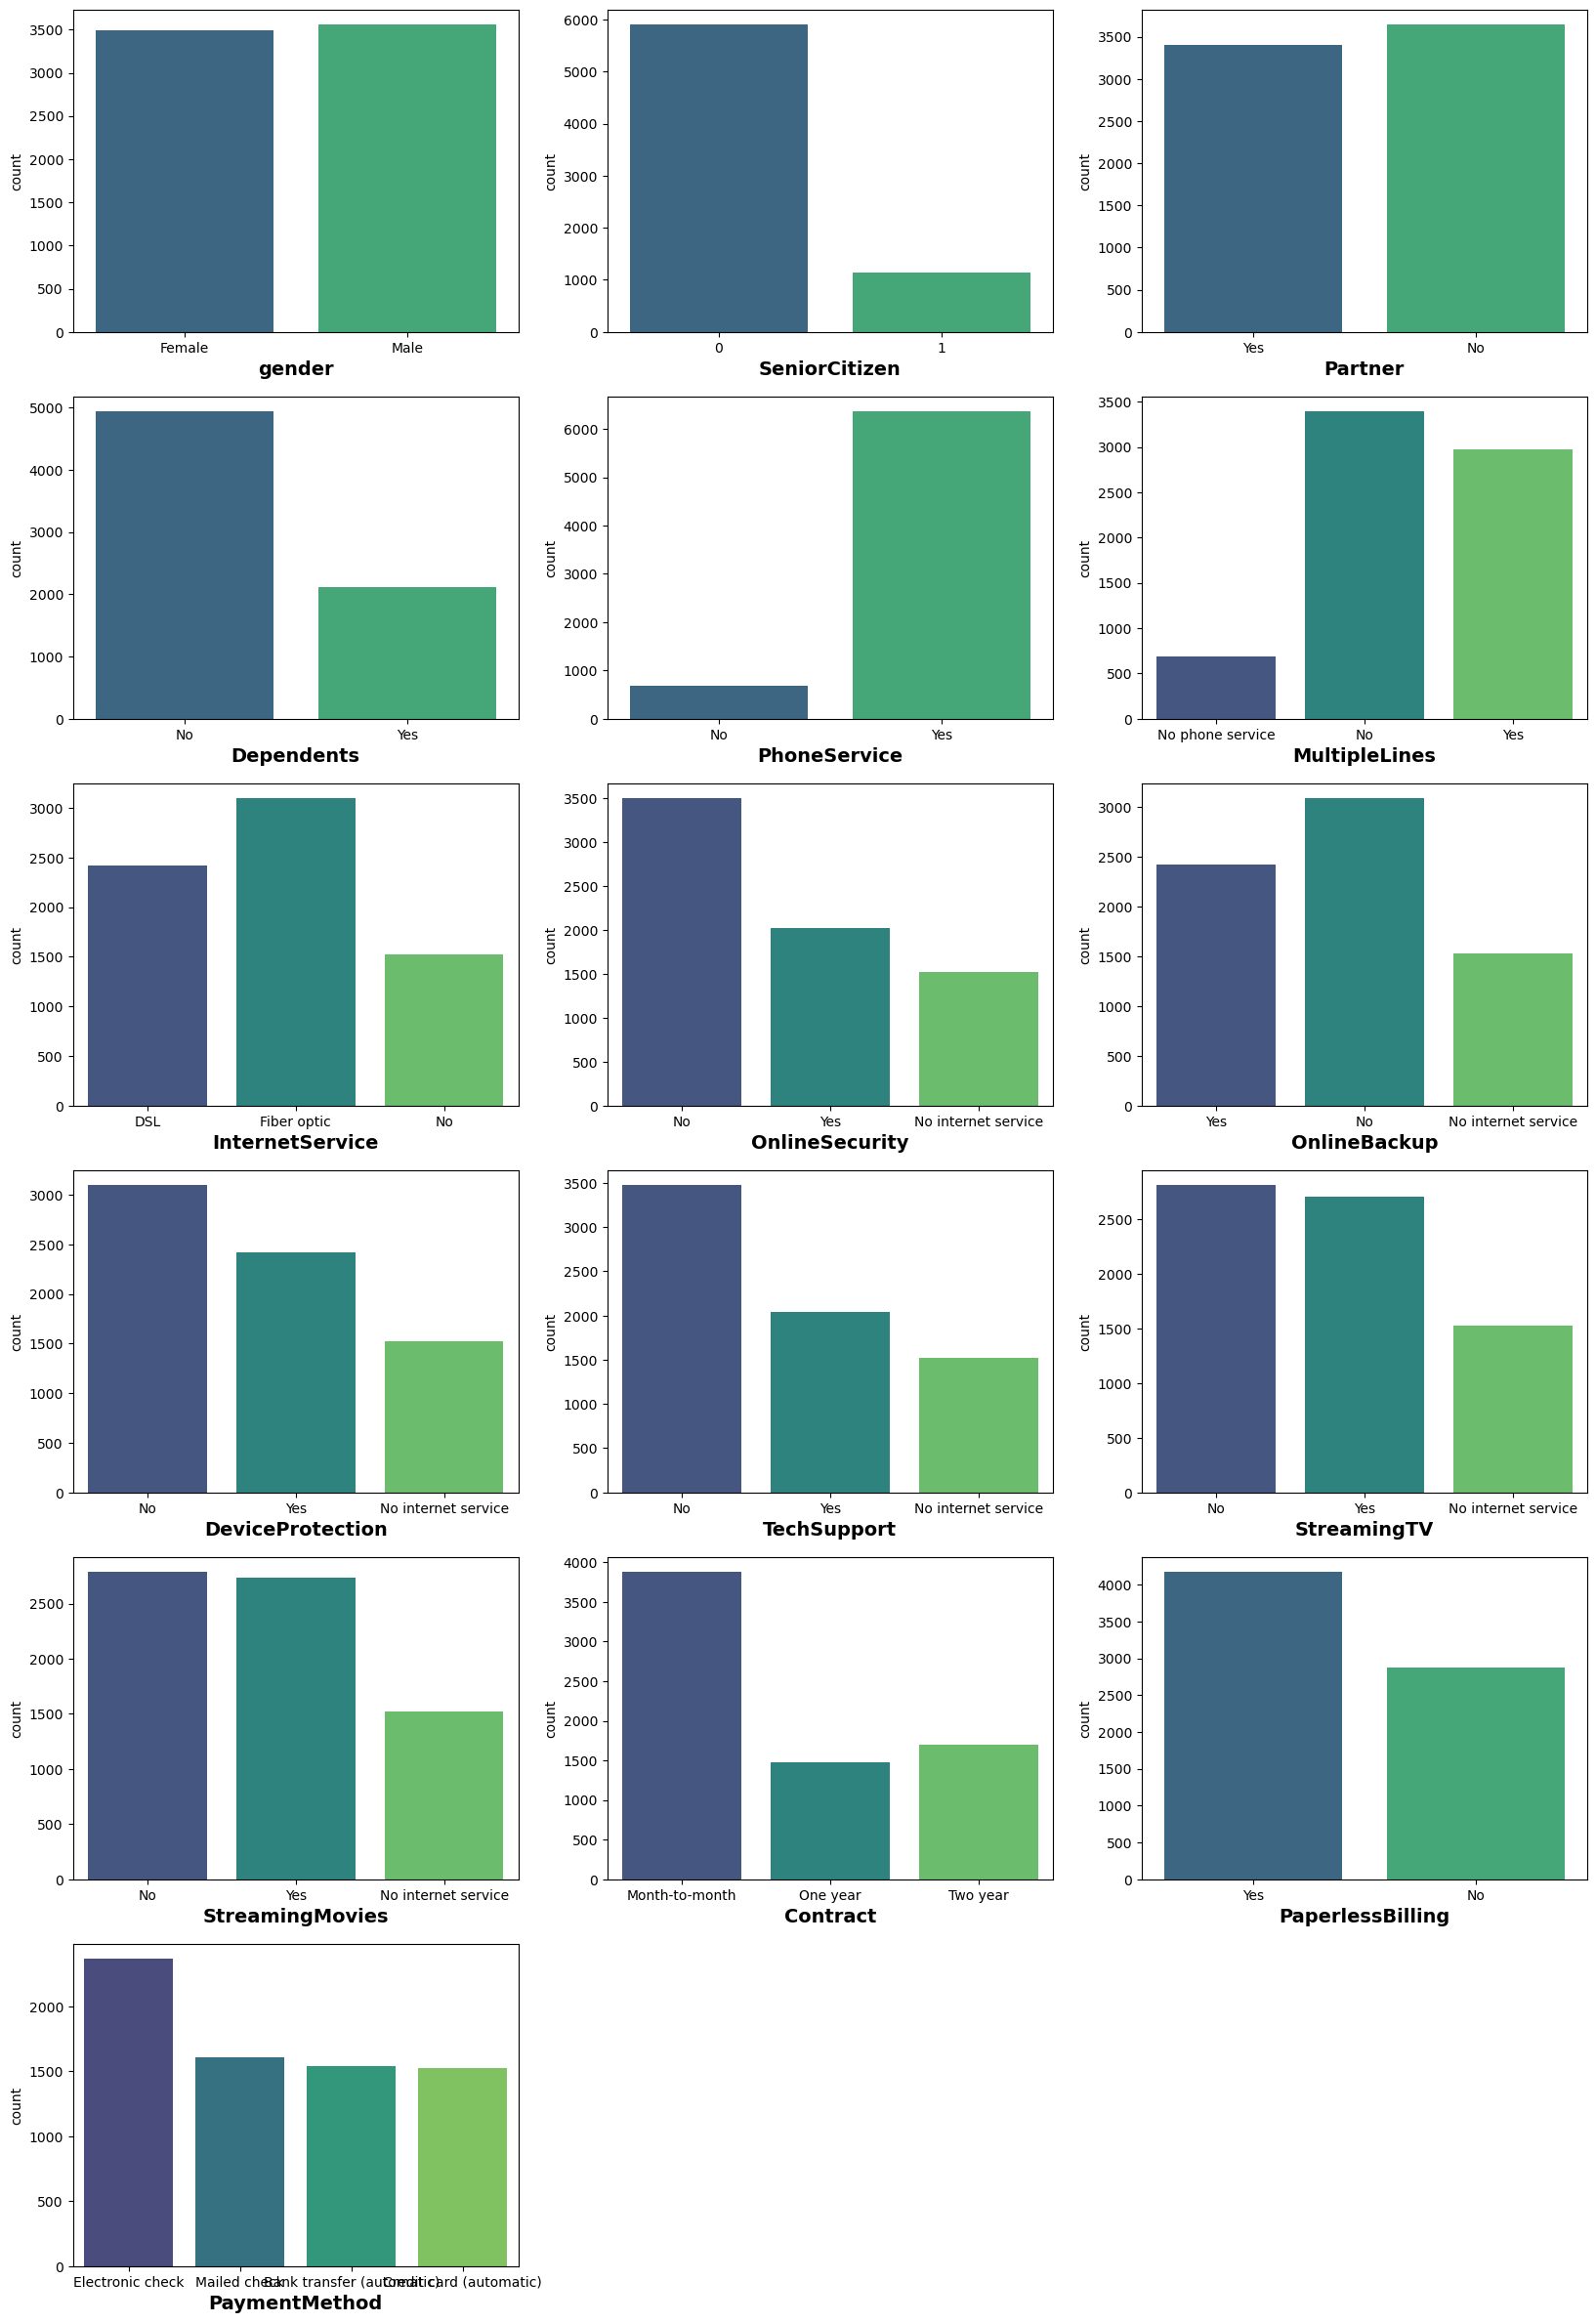

In [21]:
# Lets plot the graphs for this features
plt.figure(figsize=(20,30))
plotnumber = 1
for i in binary_col:
    if plotnumber<=len(binary_col):
        plt.subplot(6,3,plotnumber)
        sns.countplot(data[i],palette='viridis')
        plt.xlabel(i, fontsize = 14, fontweight = 'bold')
            
    plotnumber+=1
    
plt.show()

## Observations :
* We have almost same number of male and female customers
* Most of the customers are youngesters(5901), where as only 1142 customers are SeniorCitizen
* The very less customers are dependent (2110), as compare to the independent customers(4933)
* Almost 90% customers have PhoneService (6361)
* Only 2019 customers have online services where as 3498 customer don't have online security, also 1526 customers don't have any internet services 


In [22]:
 # Now lets change the datatypes of some features
data.dtypes.sort_values()

SeniorCitizen         int64
tenure                int64
MonthlyCharges      float64
TotalCharges        float64
gender               object
PaymentMethod        object
PaperlessBilling     object
Contract             object
StreamingMovies      object
StreamingTV          object
TechSupport          object
OnlineBackup         object
OnlineSecurity       object
InternetService      object
MultipleLines        object
PhoneService         object
Dependents           object
Partner              object
DeviceProtection     object
Churn                object
dtype: object

In [23]:
numerical_col = ["tenure","MonthlyCharges", "TotalCharges"]

In [24]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#### tenure : Number of months the customer has stayed with the company
   * The average tenure of a customer is 32 months which is nearly 3 years
   * The highest teanure is 72 months which is 6 years 
   * The least teanure is 18 months which is 1.5 years
   
#### MonthlyCharges
   * The average monthly charges to the customer is 64.77
   * The maximum monthly charge is 118.76
   * The minimum monthly charge is 18.25
   
#### TotalCharges
   * The average Total charges to the customer is 2283.30
   * The maximum Total charge is 8684.80
   * The minimum Total charge is 18.80

In [25]:
# Lets understand the output feature/label
data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

* Here we can see the data is imbalanced, i.e. the number  of No is more than the number of Yes

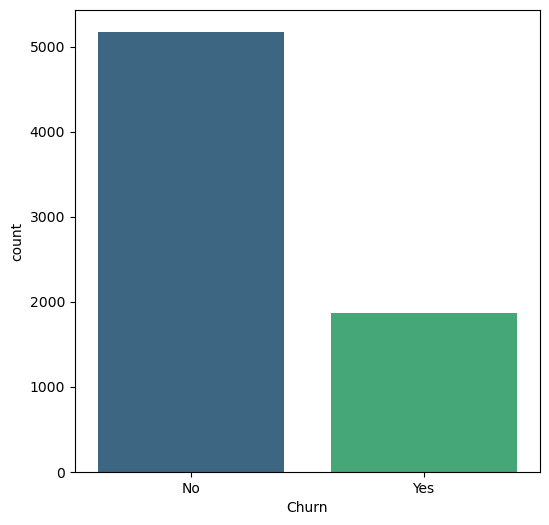

In [26]:
plt.figure(figsize = (6,6))
sns.countplot(data['Churn'], palette ='viridis')
plt.show()

In [27]:
# since the data is imbalance which is not good for the model building we need to deal with it
# before that lets convert the object data into numerical by converting the string values into the numbers
data['gender'].replace({'Female': 0, 'Male': 1},inplace = True)
data['Partner'].replace({'No': 0, 'Yes': 1},inplace = True)
data['Dependents'].replace({'No': 0, 'Yes': 1},inplace = True)
data['PhoneService'].replace({'No': 0, 'Yes': 1},inplace = True)
data['PaperlessBilling'].replace({'No': 0, 'Yes': 1},inplace = True)
data['MultipleLines'].replace({'No': 0, 'Yes': 1,'No phone service':2},inplace = True)
data['InternetService'].replace({'No': 0, 'Fiber optic': 1,'DSL':2},inplace = True)
data['OnlineSecurity'].replace({'No': 0, 'Yes': 1,'No internet service':2},inplace = True)
data['OnlineBackup'].replace({'No': 0, 'Yes': 1,'No internet service':2},inplace = True)
data['DeviceProtection'].replace({'No': 0, 'Yes': 1,'No internet service':2},inplace = True)
data['TechSupport'].replace({'No': 0, 'Yes': 1,'No internet service':2},inplace = True)
data['StreamingTV'].replace({'No': 0, 'Yes': 1,'No internet service':2},inplace = True)
data['StreamingMovies'].replace({'No': 0, 'Yes': 1,'No internet service':2},inplace = True)
data['Contract'].replace({'Month-to-month': 0, 'One year': 1,'Two year':2},inplace = True)
data['PaymentMethod'].replace({'Electronic check': 0, 'Mailed check': 1,'Bank transfer (automatic)':2,'Credit card (automatic)':3},inplace = True)
data['Churn'].replace({'No': 0, 'Yes': 1},inplace = True)

In [28]:
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,2,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,2,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1
5,0,0,0,0,8,1,1,1,0,0,1,0,1,1,0,1,0,99.65,820.50,1
6,1,0,0,1,22,1,1,1,0,1,0,0,1,0,0,1,3,89.10,1949.40,0
7,0,0,0,0,10,0,2,2,1,0,0,0,0,0,0,0,1,29.75,301.90,0
8,0,0,1,0,28,1,1,1,0,0,1,1,1,1,0,1,0,104.80,3046.05,1
9,1,0,0,1,62,1,0,2,1,1,0,0,0,0,1,0,2,56.15,3487.95,0


In [29]:
#Lets see somr numerial features distributation
num_col = ['MonthlyCharges','TotalCharges']

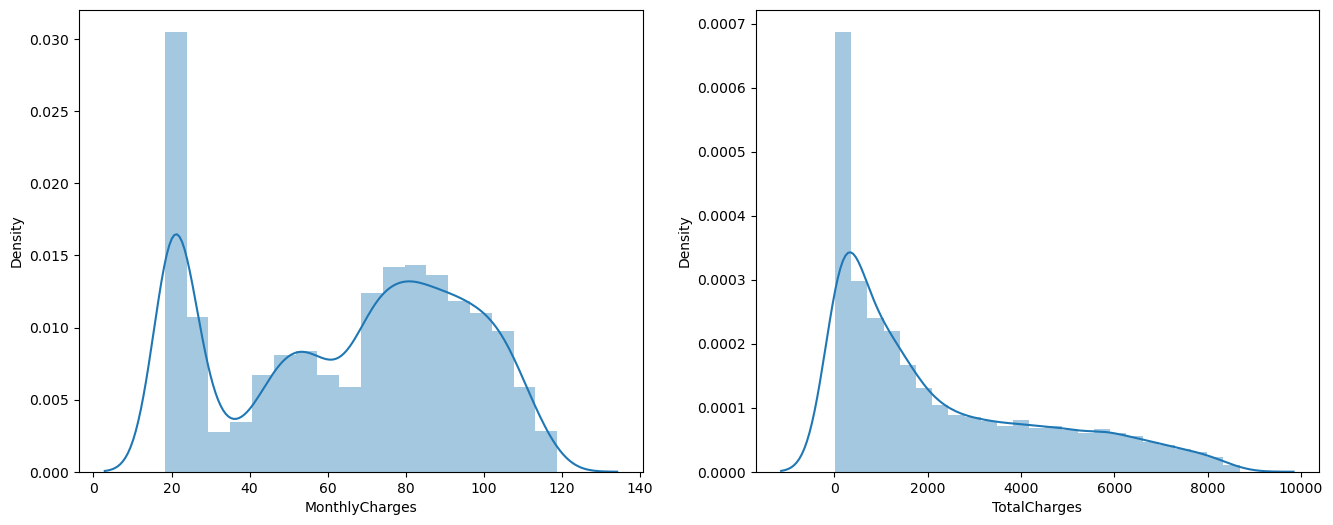

In [30]:
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.distplot(data['MonthlyCharges'])
plt.subplot(1,2,2)
sns.distplot(data['TotalCharges'])
plt.show()

In [31]:
data.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.597817
InternetService    -0.205423
OnlineSecurity      0.544240
OnlineBackup        0.407747
DeviceProtection    0.410005
TechSupport         0.535671
StreamingTV         0.320192
StreamingMovies     0.312529
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod       0.218405
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

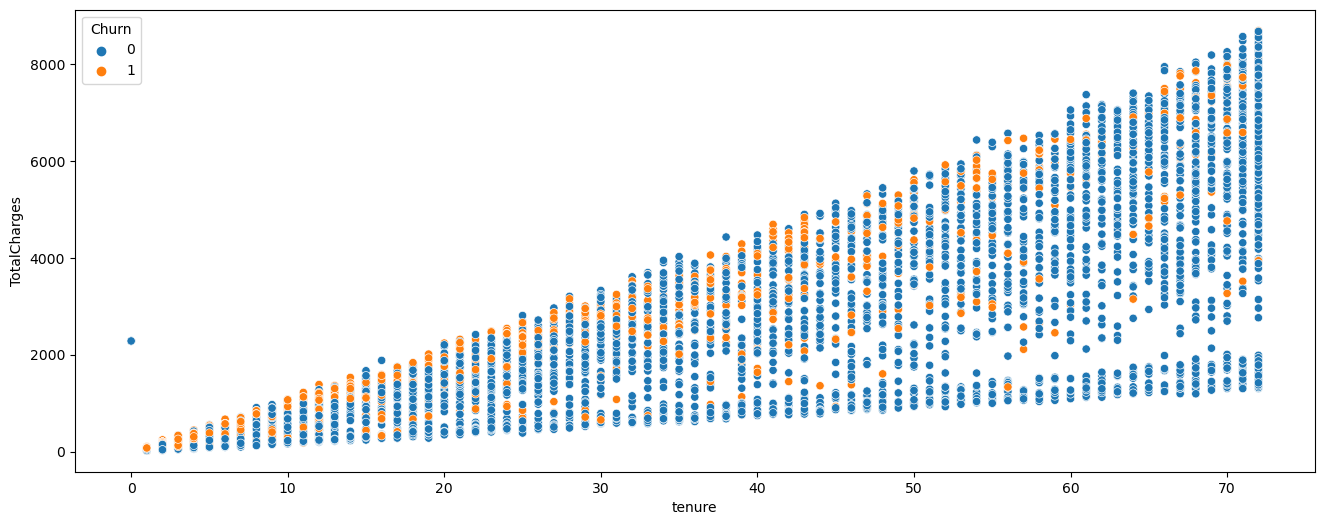

In [32]:
plt.figure(figsize = (16,6))
sns.scatterplot(y='TotalCharges',x = 'tenure', data = data ,hue = 'Churn' )
plt.show()

### Observation:
   * The Total Charges of the customer is increase with increase in tenure

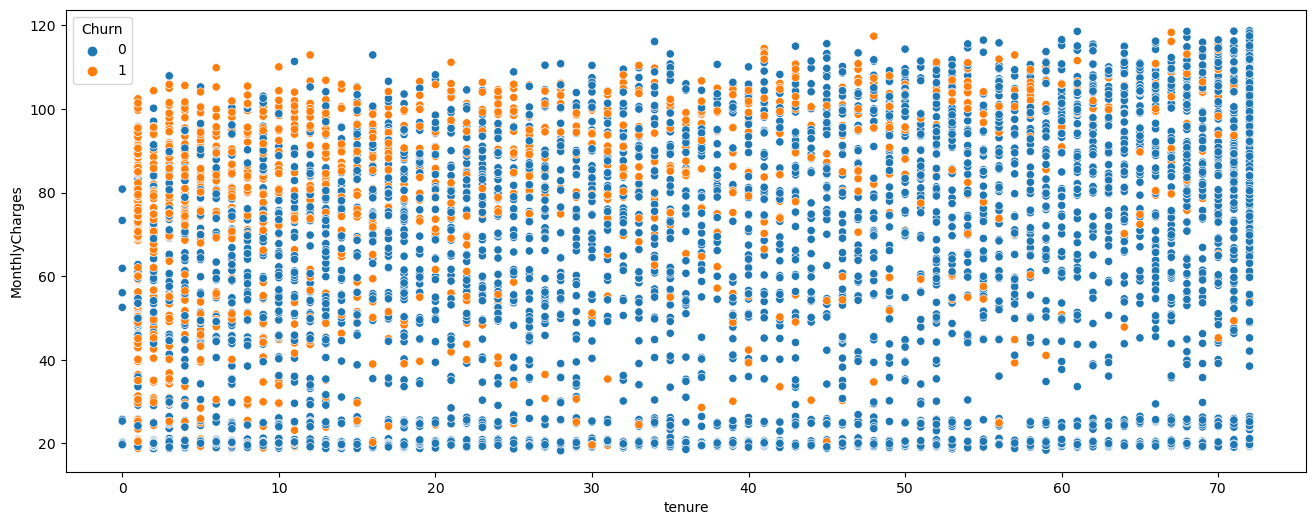

In [33]:
plt.figure(figsize = (16,6))
sns.scatterplot(y='MonthlyCharges',x = 'tenure', data = data ,hue = 'Churn' )
plt.show()

### Observation:
   * We can see the uniform distributation for the monthly charges
   * The monthly charges are same for all the customers

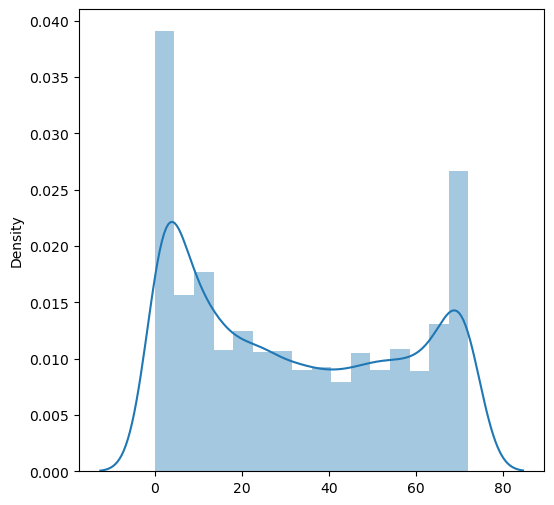

In [34]:
plt.figure(figsize = (6,6))
sns.distplot(x = data['tenure'])
plt.show()

In [35]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.000485,0.000863,-0.003429,-0.002032,0.005092,0.000985,0.001156,-0.000191,0.000126,-0.011754,-0.005209,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.099883,0.032310,-0.210897,-0.152780,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,0.156530,-0.093704,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.090981,-0.000891,0.081850,0.087055,0.094451,0.069072,0.080127,0.075779,0.294806,-0.014877,0.133115,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.016875,-0.044590,0.190523,0.162445,0.156439,0.180832,0.140395,0.125820,0.243187,-0.111377,0.123844,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.242279,0.030359,0.145298,0.178651,0.178649,0.144459,0.136145,0.140781,0.671607,0.006152,0.340305,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.691070,-0.387436,0.125353,0.150338,0.138755,0.123350,0.171538,0.165205,0.002247,0.016505,-0.004070,0.247398,0.112851,0.011942
MultipleLines,-0.000485,0.099883,0.090981,-0.016875,0.242279,-0.691070,1.000000,0.340949,-0.235021,-0.210372,-0.200463,-0.232155,-0.202414,-0.195815,0.078613,0.108230,0.030659,0.146153,0.251095,0.019423
InternetService,0.000863,0.032310,-0.000891,-0.044590,0.030359,-0.387436,0.340949,1.000000,-0.607788,-0.658287,-0.662957,-0.609795,-0.712890,-0.709020,-0.099721,0.138625,-0.008124,0.323260,0.175429,0.047291
OnlineSecurity,-0.003429,-0.210897,0.081850,0.190523,0.145298,0.125353,-0.235021,-0.607788,1.000000,0.751661,0.749040,0.791225,0.701976,0.704984,0.389978,-0.334003,0.213800,-0.621227,-0.153051,-0.332819
OnlineBackup,-0.002032,-0.152780,0.087055,0.162445,0.178651,0.150338,-0.210372,-0.658287,0.751661,1.000000,0.740604,0.754095,0.720671,0.716700,0.351267,-0.262402,0.182909,-0.538454,-0.084920,-0.291449


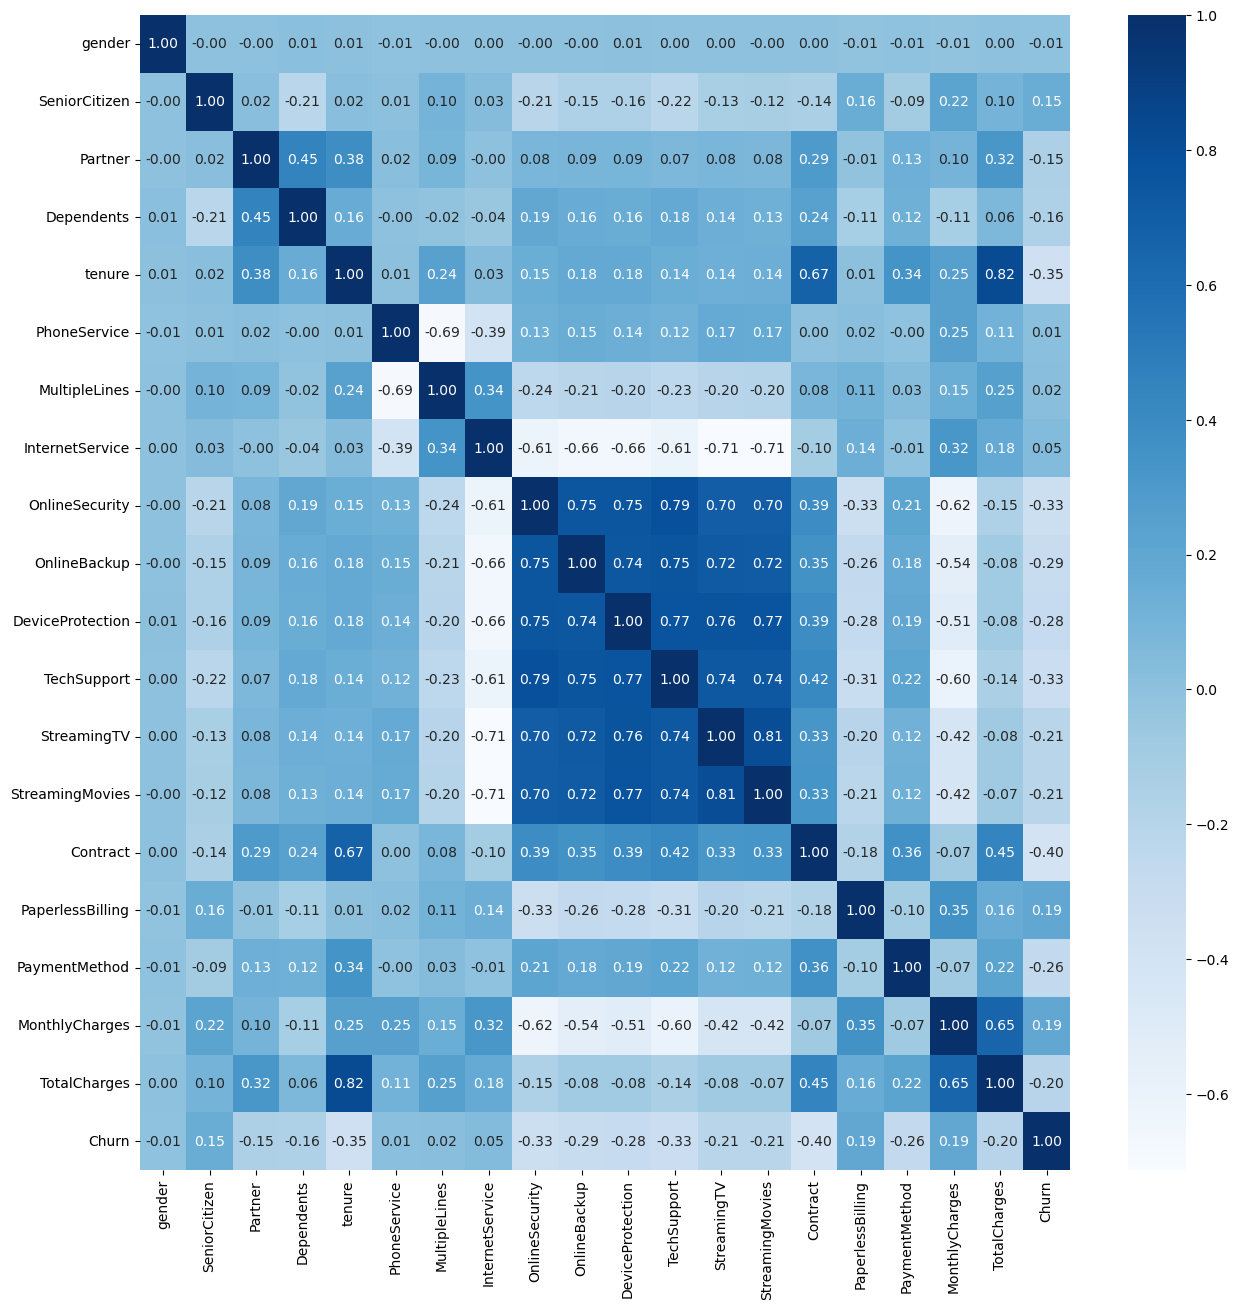

In [36]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(),cmap = 'Blues', annot =True, fmt = '.2f')
plt.show()

In [37]:
data.shape

(7043, 20)

In [38]:
 data["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [39]:
X = data.drop('Churn', axis =1)
y = data["Churn"]

In [40]:
# Balancing using SMOTE
from imblearn.over_sampling import SMOTE

In [41]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
x,y = oversample.fit_resample(X, y)

In [42]:
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .30, random_state = 40)

In [45]:
print('train size', x_train.shape, y_train.shape)
print('test size', x_test.shape, y_test.shape)

train size (7243, 19) (7243,)
test size (3105, 19) (3105,)


In [46]:
# Lets first scale the data
from sklearn.preprocessing import StandardScaler

In [47]:
scaler= StandardScaler()
x_train1 = scaler.fit_transform(x_train)# Scaling the traing data 
x_test1 = scaler.transform(x_test)

In [48]:
#Lets tanasfor the data to reduce the skewness of TotalCharges column
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
x_train_transform = pt.fit_transform(x_train1)
x_test_transform = pt.transform(x_test1) 

In [49]:
# Checking Multicollinearity between features using variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x_train_transform):
    vif= pd.DataFrame()
    vif['VIF']= [variance_inflation_factor(x_train_transform,i) for i in range(x_train_transform.shape[1])]
    vif['Features']= x.columns
    return vif

In [50]:
cal_vif(x_train_transform)

,VIF,Features
0,1.091820,gender
1,3.816519,SeniorCitizen
2,1.840134,Partner
3,3.279832,Dependents
4,18.306512,tenure
5,6.604051,PhoneService
6,1.637569,MultipleLines
7,2.343314,InternetService
8,3.317431,OnlineSecurity
9,2.581494,OnlineBackup


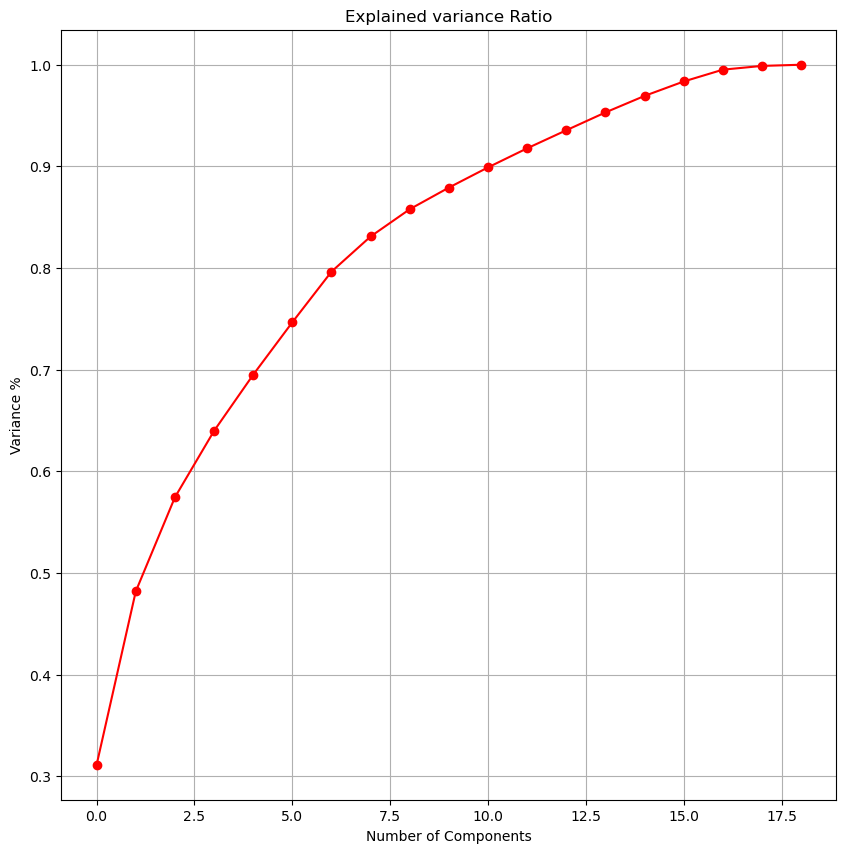

In [51]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(x_train_transform)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

# Observation :
AS per the graph, we can see that 10 principal components attribute for 90% of variation in the data. We shall pick the first 10 components for our prediction

In [52]:
pca_new = PCA(n_components=10)
x_train_new = pca_new.fit_transform(x_train_transform)
x_test_new =  pca_new.transform(x_test_transform)

In [53]:
principle_x =pd.DataFrame(x_train_new,columns=np.arange(10))
principle_x1 =pd.DataFrame(x_test_new,columns=np.arange(10))

## Machine Learning Model Building

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [55]:
acc = []
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(principle_x,y_train)
    y_pred=m.predict(principle_x1)
    print('Classification ML Algorithm Evaluation Matrix',m,'is')
    print('\n')
    print('Accuracy Score :', accuracy_score(y_test, y_pred))
    acc.append(accuracy_score(y_test, y_pred))
    print('\n')
    print('Confusion matrix :',confusion_matrix(y_test, y_pred))
    print('\n')
    print('Classification Report :',classification_report(y_test, y_pred))
    print('\n')
    print("="*50)
print(acc)

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score : 0.8096618357487922


Confusion matrix : [[1192  316]
 [ 275 1322]]


Classification Report :               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1508
           1       0.81      0.83      0.82      1597

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score : 0.8173913043478261


Confusion matrix : [[1226  282]
 [ 285 1312]]


Classification Report :               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1508
           1       0.82      0.82      0.82      1597

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3

In [56]:
# CrossValidation :
from sklearn.model_selection import cross_val_score
cv_score = []
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m,principle_x1,y_test, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    cv_score.append(score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('='*50)



Cross Validation Score LogisticRegression() :

Score : [0.77777778 0.82447665 0.82930757 0.82447665 0.81803543]
Mean Score : 0.8148148148148149
Std deviation : 0.01886190075922231




Cross Validation Score SVC() :

Score : [0.79227053 0.82769726 0.82608696 0.81481481 0.82930757]
Mean Score : 0.818035426731079
Std deviation : 0.0138523756313086




Cross Validation Score GaussianNB() :

Score : [0.76006441 0.80032206 0.80354267 0.8115942  0.80676329]
Mean Score : 0.7964573268921095
Std deviation : 0.018573746673489485




Cross Validation Score DecisionTreeClassifier() :

Score : [0.73590982 0.75845411 0.74396135 0.77616747 0.7568438 ]
Mean Score : 0.7542673107890498
Std deviation : 0.013762229062300478




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.7568438  0.8099839  0.79388084 0.78904992 0.78904992]
Mean Score : 0.7877616747181964
Std deviation : 0.017265604062712023




Cross Validation Score RandomForestClassifier() :

Score : [0.80676329 0.81803543

In [57]:
mod=["LogisticRegression",
        "SVC",
        "GaussianNB",
        "DecisionTreeClassifier",
        "KNeighborsClassifier(n_neighbors = 3)",
        "RandomForestClassifier",
        "ExtraTreesClassifier"]
print(len(mod))

7


In [58]:
score_table = pd.DataFrame()
score_table["Model_name"] = mod
score_table["Model_accuracy_score"] = acc
score_table["CV_score"] = cv_score

In [61]:
score_table.sort_values(by ='Model_accuracy_score', ascending=False, ignore_index = True)

,Model_name,Model_accuracy_score,CV_score
0,RandomForestClassifier,0.826087,0.824477
1,ExtraTreesClassifier,0.819324,0.817069
2,SVC,0.817391,0.818035
3,LogisticRegression,0.809662,0.814815
4,GaussianNB,0.799678,0.796457
5,KNeighborsClassifier(n_neighbors = 3),0.798068,0.787762
6,DecisionTreeClassifier,0.768116,0.754267


The Model random forest classifire giving the bset result with tha accuracy of 83%.

## HyperPratameter Tunning using GridSearchCV

In [60]:
from sklearn.model_selection import GridSearchCV

In [82]:
grid_parm = {
    'n_estimators': [10, 20, 40, 50, 70, 80, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,4,6,8],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes':[1,2,4,5],
    'max_samples': [0.0, 0.001, 0.1, 1]
}




In [83]:
esti = RandomForestClassifier()
grid_search = GridSearchCV(estimator = esti, param_grid = grid_parm, cv = 5,verbose=2)

In [84]:
grid_search.fit(principle_x,y_train)

Fitting 5 folds for each of 1792 candidates, totalling 8960 fits
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=0.0, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=0.0, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=0.0, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=0.0, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=0.0, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=0.0, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=0.0, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, m

[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=100; total tim

[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0

[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=70; total time=

[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=0.0

[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=

[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=0.0

[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=20; total ti

[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=100; total 

[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.0

[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=70; total time=

[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=0.0

[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=

[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.0

[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=20; total ti

[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=1, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=1, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=1, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=1, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=1, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=1, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=1, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=1, max_samples=0.001, n

[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=

[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=

[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=100; total ti

[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.0

[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=70; total time=

[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.0

[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=50; total time=

[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=100; total time

[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.0

[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=

[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=0.0

[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=

[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=0.0

[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=

[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=100; total ti

[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0

[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=70; total time=

[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=0.0

[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=50; total time=

[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.0

[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=

[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=

[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.0

[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=

[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=0.0

[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=

[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=0.0

[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=20; total ti

[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators

[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators

[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators

[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.0, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.0, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.0, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.0, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.0, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.0, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.0, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.0, n_estimators

[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators

[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001

[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estima

[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=0.0, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=0.0, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=0.001, n_est

[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=0.0, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=0.0, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=0.0, n_estimators=10; 

[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=0.

[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=80; total time=

[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=0.0

[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=50; total time=

[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=0.0

[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=40; total time=

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=2, max_samples=1, n_es

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_es

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=5, max_samples=1

[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=1, max_samples=0.1, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=1, max_samples=0.1, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=1, max_samples=0.1, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=1, max_samples=0.1, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=1, max_samples=0.1, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=1, max_samples=0.1, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=1, max_samples=0.1, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=1, max_

[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_

[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=2, 

[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_

[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=4, max_samples=1

[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes

[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.1, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.1, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.1, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.1, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.1, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.1, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=5, max_samples=0.1, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, max_leaf_nodes=5, max_s

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=1, max_s

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, m

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=2, max_s

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.0, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=4

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=4, max_s

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.0, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.0, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=5, 

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, max_leaf_nodes=5, max_s

[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=1, max_samples=0.1, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=1, max_samples=0.1, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=1, max_samples=0.1, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=1, max_samples=0.1, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=1, max_samples=0.1, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=1, max_samples=0.1, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=1, max_samples=0.1, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=1, max_s

[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_

[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=2, m

[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_

[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=4, max_samples=1, n

[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_

[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, max_leaf_nodes=5, max_samples=1

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=1, max_s

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=2, 

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=4, max_sam

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.0, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.0, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.0, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.0, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.0, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=5, ma

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=70; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, max_leaf_nodes=5, max_s

[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=0.0, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=0.0, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=0.0, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=0.0, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=0.0, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=0.0, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=0.0, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=1, max_s

[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=1, max_samples=1, n_es

[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_

[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=2, 

[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_

[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=4, max_samples=1

[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_

[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, max_leaf_nodes=5, max_samples=1

[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=1, max_samples=0.1, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=1, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=1, max_samples=1

[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_

[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=2, max_samples=0.1, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=2, 

[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_

[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=4, max_samples=1

[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_

[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, max_leaf_nodes=5, max_samples=1

[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=1, max_samples=1, n_es

[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=0.001, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_

[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=1, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=2, max_samples=1, n_es

[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_

[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=4, max_samples=1

[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=0.001, n_estimators=40; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_

[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=0.1, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=1, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, max_leaf_nodes=5, max_samples=1

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [1, 2, 4, 5],
                         'max_samples': [0.0, 0.001, 0.1, 1],
                         'n_estimators': [10, 20, 40, 50, 70, 80, 100]},
             verbose=2)

In [85]:
best_parameters = grid_search.best_params_

In [86]:
print(best_parameters)

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'max_samples': 0.1, 'n_estimators': 40}


In [87]:
print(grid_search.best_score_)

0.789451383884485


In [106]:
rf = RandomForestClassifier(criterion ='gini',
                            max_depth= 80, 
                            max_features= 'sqrt', 
                            max_leaf_nodes= 20, 
                            max_samples= .1, 
                            n_estimators= 70)

rf.fit(principle_x,y_train)
y_pred=rf.predict(principle_x1)
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :',classification_report(y_test, y_pred))


Accuracy Score : 0.8099838969404187


Confusion matrix : [[1227  281]
 [ 309 1288]]


Classification Report :               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1508
           1       0.82      0.81      0.81      1597

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



In [108]:
# AUC ROC CURVE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [126]:
y_pred_proba = rf.predict_proba(principle_x1)[:,1]


In [136]:
roc_auc_score = roc_auc_score(y_test,rf.predict(principle_x1))
print(auc_score)

0.8100863439240352


In [137]:
# THe roc_auc_score is 81%

In [127]:
fpr , tpr, threshold = roc_curve(y_test, y_pred_proba)

In [128]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99270557, 0.99469496,
       1.        ])

In [129]:
tpr 

array([0.        , 0.00500939, 0.00626174, ..., 1.        , 1.        ,
       1.        ])

In [130]:
threshold

array([       inf, 0.89322876, 0.89214269, ..., 0.07566753, 0.07533435,
       0.06682681])

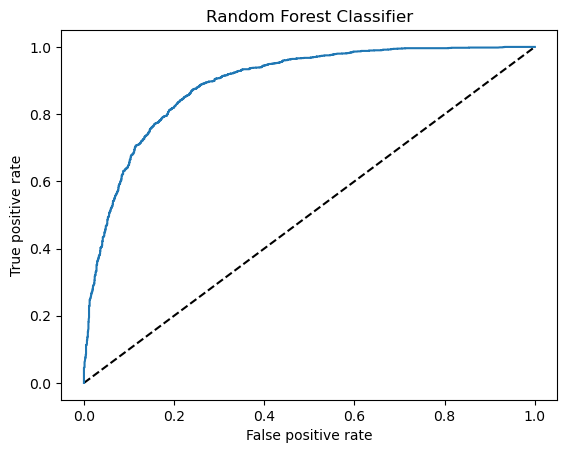

In [131]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label = 'Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

## Saving the model

In [132]:
import joblib

In [133]:
joblib.dump(rf,"Customer_Churn_Prediction_.obj")

['Customer_Churn_Prediction_.obj']